<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** María Fernanda Amador Alvarez, Xareny Gonzalez Lopez.

**Fecha:** 23 de noviembre del 2021.

**Expediente** : 725573, 720811.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/feramdor/Tarea8_Amador_Gonzalez

# Tarea 8: Clase 22

## Enunciado de tarea 
> Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de compararlo con los resultados teóricos del método de valuación de Black-Scholes (ecuación del principio)

In [1]:
# Librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import yfinance as yf
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

#### Código de solución `Estudiante 1: Fernanda Amador`

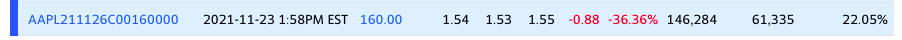

> Podemos observar que se tiene un strike price de 160, lo cual se utilizará a lo largo de la tarea.

In [2]:
# Funciones
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

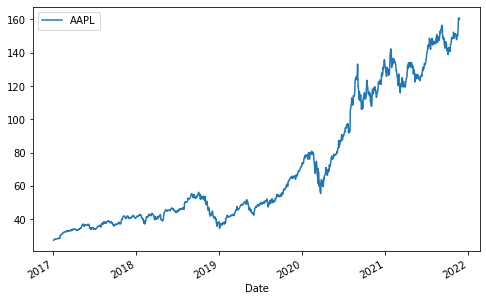

In [3]:
# Obtenemos precios al cierre
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

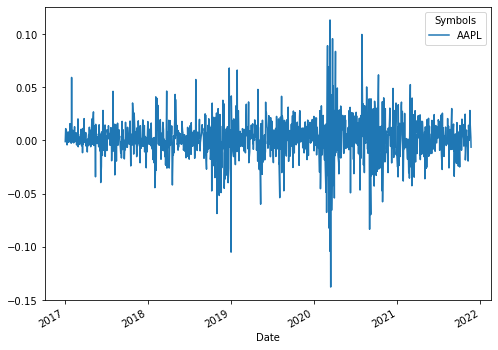

In [4]:
# Obtenemos los rendimientos 
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [5]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2021-11-17,0.016
2021-11-18,0.029
2021-11-19,0.017


In [6]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-09-16'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
                '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
                '2022-09-15', '2022-09-16'],
               dtype='datetime64[ns]', length=214, freq='B'),
 214)

In [7]:
ri = calc_daily_ret(closes_aapl)

# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]


# Simulación del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [8]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0014343584295070052, 0.019199243953207122)

In [9]:
# Tasa de bonos de 1 yr de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [10]:
today = pd.to_datetime(date.today())
expiry = '2022-09-16'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-09-05', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', length=214, freq='B')

In [11]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,-0.026,0.017,0.010,...,-0.018,1.611e-02,-0.002
2021-11-24,-0.034,0.012,0.024,...,-0.014,8.479e-03,-0.015
2021-11-25,-0.035,0.003,0.046,...,-0.012,2.413e-04,-0.024
2021-11-26,-0.078,0.004,0.031,...,-0.025,2.370e-02,-0.044
2021-11-29,-0.074,-0.019,0.022,...,-0.064,2.417e-02,-0.050
...,...,...,...,...,...,...,...
2022-09-12,-0.204,-0.300,0.346,...,-0.470,-3.893e-01,0.089
2022-09-13,-0.207,-0.302,0.344,...,-0.495,-3.651e-01,0.086
2022-09-14,-0.211,-0.286,0.353,...,-0.506,-3.402e-01,0.100
2022-09-15,-0.171,-0.322,0.322,...,-0.511,-3.206e-01,0.060


In [12]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,155.943,162.772,161.576,...,157.185,162.604,159.683
2021-11-24,154.615,161.894,163.820,...,157.780,161.367,157.582
2021-11-25,154.431,160.458,167.617,...,158.088,160.044,156.187
2021-11-26,148.042,160.710,165.099,...,156.053,163.843,153.191
2021-11-29,148.660,157.041,163.534,...,150.057,163.919,152.195
...,...,...,...,...,...,...,...
2022-09-12,130.447,118.575,226.053,...,100.028,108.412,174.885
2022-09-13,130.039,118.322,225.618,...,97.498,111.065,174.397
2022-09-14,129.630,120.247,227.663,...,96.443,113.859,176.788
2022-09-15,134.813,115.960,220.746,...,96.020,116.116,169.847


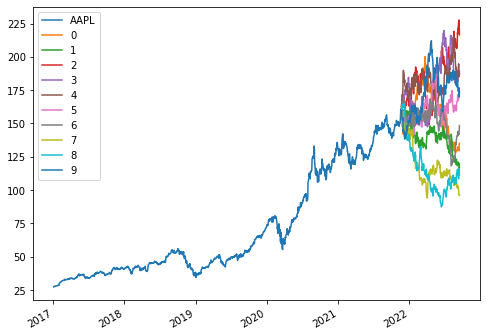

In [13]:
# Precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize = (8,6));

In [14]:
from datetime import date
Hoy = date.today()
expiry = '2022-09-16'
K = 160 # strike price
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# Simular precios
sim_closes = S0*np.exp(sim_ret.cumsum())

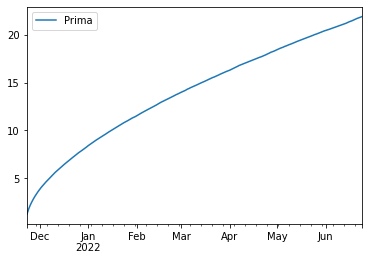

In [15]:
# Valor del call 
strike = 160
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [16]:
call.iloc[-1]

Prima    21.885
Name: 2022-06-24 00:00:00, dtype: float64

In [17]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(21.587372481726796, 22.181889269488607)
(21.58737607967272, 22.181885671542684)


### Utilizando BlackScholes

In [18]:
# Datos para usar en la fórmula (anualizados)
vol = ret_aapl['AAPL'].std()*np.sqrt(252)
media = ret_aapl['AAPL'].mean()*252
maduracion = ndays
st = closes_aapl.iloc[-1,0]
rf = r*360
print('Volatilidad anual',vol)
print('Tiempo de maduración',maduracion,'días')
print('Spot price',st)
print('Strike Price',K)
print('Tasa Libre de riesgo',r*360*100)

Volatilidad anual 0.30477854916388
Tiempo de maduración 214 días
Spot price 160.0050048828125
Strike Price 160
Tasa Libre de riesgo 0.018000000000000002


In [19]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con Black Scholes es:',put,'y el valor de la opción simulado es de:',call.iloc[-1].values)


El valor de la opción con Black Scholes es: 19.360876050192473 y el valor de la opción simulado es de: [21.88463088]


> Podemos ver la que la diferencia entre el modelo de BlackScholes y el valor que nos da en la simulación nos da unos valores un poco alejados, considero que esto se debe a las librerías que dejaron de servir para Python; los resultados ya no son tan acercados. 

In [21]:
# Reducción de varianzas
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.cdf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), 
                      index =dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike - sim_closes2,np.zeros([ndays,nscen])).T.mean()}, 
                   index = dates)
put.plot();

AttributeError: 'numpy.float64' object has no attribute 'norm'

In [ ]:
put.iloc[-1]

In [ ]:
# 95% de confianza
confianza = 0.95
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i2)

In [ ]:
# Ajustando norm
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],
                   bins = 50,
                   density = True,
                   label = 'Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,
                        loc = mu_fit,
                        scale = sd_fit)
plt.plot(ren_gen,
         curve_fit,
         label = 'Distribución ajustada')
plt.legend()
plt.show();

AttributeError: 'numpy.float64' object has no attribute 't'

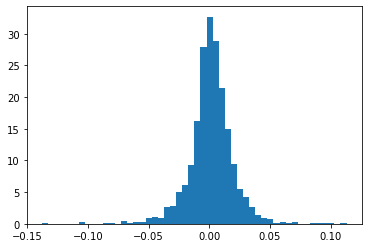

In [22]:
# Ajustando t
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],
                   bins = 50,
                   density = True,
                   label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren.values) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,
                     df = dof,
                     loc = mu_fit,
                     scale = sd_fit)
plt.plot(ren_gen,
        curve_fit,
         label = 'Distribución ajustada')
plt.legend()
plt.show();

In [ ]:
st.probplot(ren['AAPL'],
            sparams= dof, 
            dist = 't', 
            plot = plt);

In [ ]:
# Histograma de rendimientos
ndays = len(dates) 
nscen = 10

prob = y/np.sum(y)
values = x[1:]
prob.sum()

In [ ]:
# Rendimientos simulados
ret = np.random.choice(values, ndays*nscen, p=prob)
# Fechas
dates = pd.date_range(start=Hoy,periods=ndays)
# Rendimien en Data Frame
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

In [ ]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

In [ ]:
sim_closes_hist.plot(figsize =(8,6),
                     legend = False);

In [ ]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize = (8,6),
                                              legend = False)
plt.title('Simulación usando el histograma de los rendimientos');

In [ ]:
K = 160
ndays = len(dates)
nscen = 10000
freq, values = np.histogram(ret_aapl + r - mu, 
                            bins = 2000)
prob = freq/np.sum(freq)
ret = np.random.choice(values[1:],ndays*nscen,p = prob)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

In [ ]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays) \
                          *np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [ ]:
put_hist.iloc[-1]

In [ ]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale = sigma_est)
print(i1)
print(i1)

#### Código de solución `Estudiante 2: Xareny Gonzalez`

In [ ]:
# Código de solución estudiante 2
.
.
.
.
